## Benchmark of fixed-point array arithmetic library
Test platform:
- Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz   1.50 GHz 
- 8GB RAM
- Windows 10 Home
- Python 3.9.5
- Numpy 1.20.3
- MATLAB R2018b
- fxpmath 0.4.0
- numfi 0.2.3

In [23]:
%matplotlib inline
import numpy as np
from fxpmath import Fxp
from numfi import numfi
import matplotlib.pyplot as plt

In [24]:
def compare(numfi_obj, fxp_obj):
    if np.all(numfi_obj.int == fxp_obj.val):
        print("    Bits exact same")
    else:
        err = np.abs(numfi_obj.double - fxp_obj.real)
        print("    Bits not exact same, max error: ", np.max(err))

In [25]:
x = np.random.rand(100000)+1 # +1 to avoid divide by zero
y = np.random.rand(100000)+1 
s,w,f = 1,16,8
nx = numfi(x,s,w,f)
ny = numfi(y,s,w,f)
fx = Fxp(x,s,w,f,rounding='around')
fy = Fxp(y,s,w,f,rounding='around')
# both rounding = np.round, overflow = saturate

### Matlab benchmark code
```matlab
x = rand(1,100000);
y=  rand(1,100000);
s=1;
w=16;
f=8;
fx = fi(x,s,w,f);
fy = fi(y,s,w,f);
time = zeros(1,7);
for i =1:7
    t = tic;
    for j=1:10
        temp = fx .* fy;
    end
    time(i) = toc(t)/10;
end
disp(mean(time)*1000)
```

In [26]:
# fixed point initialization
init_n = %timeit -o a = numfi(x,s,w,f)
init_f = %timeit -o b = Fxp(x,s,w,f,rounding='around') 
# matlab 8.8162 ms
a = numfi(x,s,w,f)
b = Fxp(x,s,w,f,rounding='around') 
compare(a,b)

1.08 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
118 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits exact same


In [27]:
# fixed point array add float scalar
adds_n = %timeit -o a = nx + np.pi
adds_f = %timeit -o b = fx + np.pi 
# matlab: 27.7660 ms
compare(nx + np.pi, fx + np.pi)

# fixed point array add float array
adda_n = %timeit -o a = nx + x
adda_f = %timeit -o b = fx + x
# matlab: 35.5236 ms
compare(nx + x, fx + x)

# fixed point array add fixed point array
addf_n = %timeit -o nx + ny 
addf_f = %timeit -o fx + fy 
# matlab: 26.6056 ms
compare(nx + ny, fx + fy)

2.85 ms ± 498 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
137 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits exact same
4.91 ms ± 685 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
269 ms ± 38.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits exact same
1.62 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
124 ms ± 8.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits exact same


In [28]:
# fixed point array sub float scalar
subs_n = %timeit -o nx - np.pi 
subs_f = %timeit -o fx - np.pi 
# matlab: 26.0436 ms
compare(nx - np.pi, fx - np.pi)

# fixed point array sub float array
suba_n = %timeit -o nx - x 
suba_f = %timeit -o fx - x 
# matlab: 29.7733 ms
compare(nx - x, fx - x)

# fixed point array sub fixed point array
subf_n = %timeit -o nx - ny 
subf_f = %timeit -o fx - fy 
# matlab: 26.8947 ms
compare(nx - ny, fx - fy)

2.03 ms ± 346 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
130 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits exact same
4.79 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
279 ms ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits exact same
4.73 ms ± 859 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
106 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits exact same


In [29]:
# fixed point array mul float scalar
muls_n = %timeit -o nx * np.pi 
muls_f = %timeit -o fx * np.pi 
# matlab: 18.0494 ms
compare(nx * np.pi, fx * np.pi)

# fixed point array mul float array
mula_n = %timeit -o nx * x 
mula_f = %timeit -o fx * x 
# matlab: 26.2648 ms
compare(nx * x, fx * x)

# fixed point array mul fixed point array
mulf_n = %timeit -o nx * ny
mulf_f = %timeit -o fx * fy
# matlab: 17.8751 ms
compare(nx * ny, fx * fy)

1.22 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
124 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits not exact same, max error:  0.003749847412109375
2.24 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
267 ms ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits not exact same, max error:  0.00566864013671875
1.1 ms ± 63.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
64 ms ± 4.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits exact same


In [30]:
# fixed point array div float scalar
divs_n = %timeit -o nx / np.pi 
divs_f = %timeit -o fx / np.pi 
# matlab: 49.5426 ms
compare(nx / np.pi, fx / np.pi)

# fixed point array div float array
diva_n = %timeit -o nx / x 
diva_f = %timeit -o fx / x 
# matlab: 61.5865 ms 
compare(nx / x, fx / x)

# fixed point array div fixed point array
divf_n = %timeit -o nx / ny 
divf_f = %timeit -o fx / fy 
# matlab: 56.3831 ms 
compare(nx / ny, fx / fy)

1.25 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
117 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits not exact same, max error:  0.00390625
3.5 ms ± 960 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
232 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits exact same
1.61 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
61 ms ± 9.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    Bits not exact same, max error:  0.5


In [31]:
# fixed point array do logical operation
logic_n = %timeit -o nx >= 0.5
logic_f = %timeit -o fx >= 0.5
# matlab 1.1448 ms
np.all((nx >= 0.5)==(fx >= 0.5))

27.5 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
402 µs ± 126 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


True

In [32]:
# fixed point array do trigonometric operation
sin_n = %timeit -o np.sin(nx) 
sin_f = %timeit -o np.sin(fx) 
# matlab timeout
compare(np.sin(nx),np.sin(fx))

3.09 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.62 s ± 1.46 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits not exact same, max error:  3.040053394354203e-05


In [33]:
# fixed point array do reduce operation
sum_n = %timeit -o nx.sum() 
sum_f = %timeit -o fx.sum() 
# matlab 49.1531 ms
compare(nx.sum(),fx.sum()) # numfi's sum() works differently

128 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
282 µs ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
    Bits not exact same, max error:  3.4453125


In [34]:
# fixed point array do fft
fft_n = %timeit -o np.fft.fft(nx)
fft_f = %timeit -o np.fft.fft(fx)
# matlab: 2.127 ms
compare(np.fft.fft(nx),np.fft.fft(fx))

18 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.3 s ± 2.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits not exact same, max error:  147728.0


e:\Work\Code\Demo\Fixed_Point\numfi\numfi\numfi.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  return (self.ndarray * 2**self.f).astype(np.int64)


In [35]:
# fixed point array do convolution
filter = np.random.rand(256)
nf = numfi(filter,like=nx)
ff = Fxp(filter, 1,16,8,rounding='around')
conv_n = %timeit -o np.convolve(nx,nf)
conv_f = %timeit -o np.convolve(fx,ff)
# matlab: timeout
compare(np.convolve(nx,nf),np.convolve(fx,ff))

7.71 ms ± 971 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.81 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    Bits not exact same, max error:  0.00390625


In [36]:
benchmark_label = ['init',
'add float scalar', 'add float array', 'add fixed array',
'sub float scalar', 'sub float array', 'sub fixed array',
'mul float scalar', 'mul float array', 'mul fixed array',
'div float scalar', 'div float array', 'div fixed array',
'logical', 'sin()', 'sum()', 'fft()', 'convolve()-256'
]

benchmark_time = np.array([
    [i.average for i in [init_n,adds_n,adda_n,addf_n,subs_n,suba_n,subf_n,muls_n,mula_n,mulf_n,divs_n,diva_n,divf_n,logic_n,sin_n,sum_n,fft_n,conv_n]], # numfi time
    [i.average for i in [init_f,adds_f,adda_f,addf_f,subs_f,suba_f,subf_f,muls_f,mula_f,mulf_f,divs_f,diva_f,divf_f,logic_f,sin_f,sum_f,fft_f,conv_f]], # fxpmath time
    [8.8162e-3,27.7660e-3,35.5236e-3,26.6056e-3,26.0436e-3,29.7733e-3,26.8947e-3,18.0494e-3,26.2648e-3,17.8751e-3,49.5426e-3,61.5865e-3,56.3831e-3,1.1448e-3,np.inf,49.1531e-3,2.127e-3,np.inf] # matlab time
])*1000 

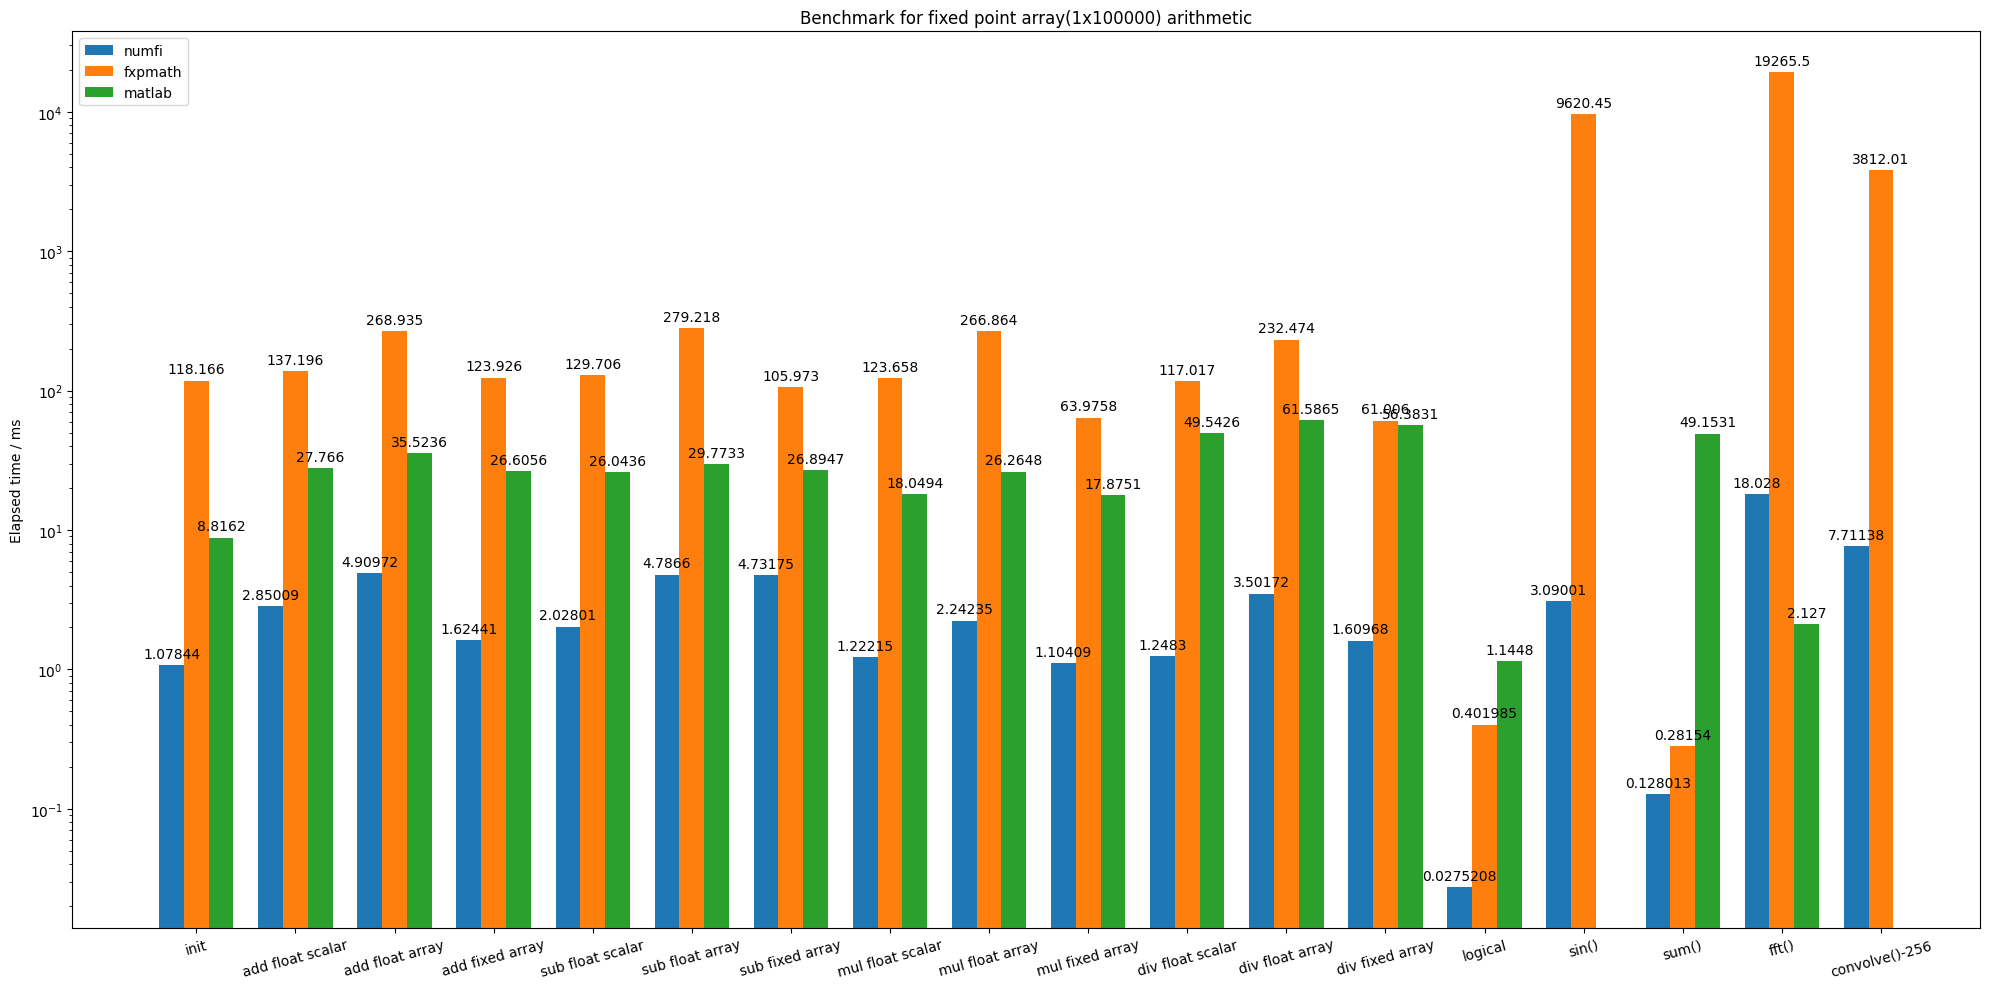

In [37]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
x = np.arange(len(benchmark_label))
w = 0.25
bar_numfi = ax.bar(x-w, benchmark_time[0], w, label='numfi')
bar_fxp = ax.bar(x, benchmark_time[1], w, label='fxpmath')
bar_matlab = ax.bar(x+w, benchmark_time[2], w, label='matlab')
ax.set_ylabel("Elapsed time / ms")
ax.set_yscale('log')
ax.set_title("Benchmark for fixed point array(1x100000) arithmetic")
ax.set_xticks(x)
ax.set_xticklabels(benchmark_label, rotation=15)
ax.legend()
ax.bar_label(bar_numfi,padding=3)
ax.bar_label(bar_fxp,padding=3)
ax.bar_label(bar_matlab,padding=3)
fig.tight_layout()
plt.savefig('./docs/benchmark.jpg')
plt.show()
